In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

In [2]:
corvid = pd.read_csv('time_series_19-covid-Confirmed.csv')
corvid.loc[[46]]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
46,NaN,Mexico,23.6345,-102.5528,0,0,0,0,0,0,...,12,12,26,41,53,82,93,118,164,203


In [3]:
for i, p in enumerate(corvid['Country/Region']):
    if p == 'Iran':
        print(i,p)

155 Iran


In [4]:
def getConfirmed(data, country_id):
    country = corvid.loc[[country_id]]
    dummy = country.values[0][4:]
    confirmed_array =  dummy[dummy > 0]
    return confirmed_array 

In [5]:
def calcFactor(x):
    suma = 0
    N = len(x)
    for i,p in enumerate(range(N-1)):
        suma +=  x[i+1]/x[i]
    
    F = suma / (N - 1)
    return N, F

In [6]:
def forecast(days, factor, start):
    xp = [start]
    for i in range(1,days):
        xp.append(xp[i-1] * factor)
    return xp

In [7]:
Mexico = getConfirmed(corvid, 46)
Mexico

array([1, 4, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 12, 12, 26, 41, 53, 82, 93,
       118, 164, 203], dtype=object)

In [8]:
mex_list = list(Mexico)
mex_list.append(251)
mex_list.append(316)
Mexico = np.array(mex_list)

In [9]:
Mexico

array([  1,   4,   5,   5,   5,   5,   5,   6,   6,   7,   7,   7,   8,
        12,  12,  26,  41,  53,  82,  93, 118, 164, 203, 251, 316])

In [10]:
Spain = getConfirmed(corvid, 18)
Spain

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 6, 13, 15, 32, 45, 84, 120, 165, 222, 259, 400, 500, 673,
       1073, 1695, 2277, 2277, 5232, 6391, 7798, 9942, 11748, 13910,
       17963, 20410, 25374], dtype=object)

In [11]:
Italy = getConfirmed(corvid, 16)
Italy

array([2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20,
       62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089,
       3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157,
       24747, 27980, 31506, 35713, 41035, 47021, 53578], dtype=object)

In [12]:
len(Italy)

51

In [13]:
Germany = getConfirmed(corvid, 11)
Germany

array([1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14, 14, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 27, 46, 48, 79,
       130, 159, 196, 262, 482, 670, 799, 1040, 1176, 1457, 1908, 2078,
       3675, 4585, 5795, 7272, 9257, 12327, 15320, 19848, 22213],
      dtype=object)

In [35]:
thr = 1
days_forecast = 100

In [36]:
mex_days, mex_factor = calcFactor(Mexico[Mexico >= thr])
spa_days, spa_factor = calcFactor(Spain[Spain >= thr])
ita_days, ita_factor = calcFactor(Italy[Italy >= thr])
ger_days, ger_factor = calcFactor(Germany[Germany >= thr])

In [37]:
mex_future = forecast(days_forecast, mex_factor, thr)#Mexico[0])
spa_future = forecast(days_forecast, spa_factor, thr)#Spain[0])
ita_future = forecast(days_forecast, ita_factor, thr)#Italy[0])
ger_future = forecast(days_forecast, ger_factor, thr)#Italy[0])

In [41]:
total_days = 50
xts = np.arange(0,total_days,5)

In [42]:
Mexico[Mexico >= thr]

array([  1,   4,   5,   5,   5,   5,   5,   6,   6,   7,   7,   7,   8,
        12,  12,  26,  41,  53,  82,  93, 118, 164, 203, 251, 316])

Text(0.5, 1.0, 'A partir de 20 o más casos confirmados, modelo exponencial - futuro (semi-log)')

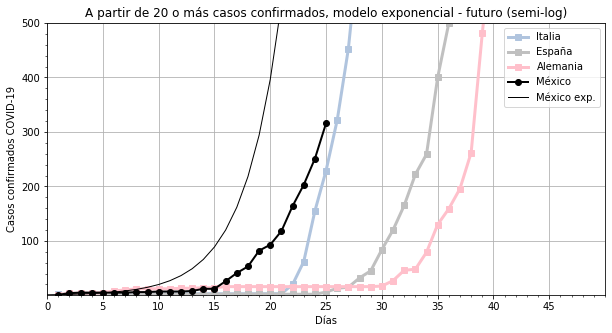

In [43]:
fig = plt.figure(figsize=(10,5))
it = Italy[Italy >= thr]
sp = Spain[Spain >= thr]
gr = Germany[Germany >= thr]
mx = Mexico[Mexico >= thr]

plt.plot([x for x in range(1, len(it)+1)], it,'s-', lw = 3.00, c ='lightsteelblue', label ='Italia')
#plt.plot(ita_future,'-', lw = 1.0, c ='lightsteelblue', label = 'Italia exp.')

plt.plot([x for x in range(1, len(sp)+1)], sp,'s-', lw = 3.00, c = 'silver', label ='España')
#plt.plot(spa_future,'-', lw = 1.0, c = 'silver', label = 'España exp.')

plt.plot([x for x in range(1, len(gr)+1)], gr,'s-', lw = 3.00, c = 'pink', label = 'Alemania')
#plt.plot(ger_future,'-', lw = 1.0, c = 'pink', label = 'Alemania exp.')

plt.plot([x for x in range(1, len(mx)+1)], mx,'o-', lw = 2.00, c='k', label = 'México')
plt.plot(mex_future,'-', lw = 1.0, c = 'k', label = 'México exp.')

plt.xlim([1,total_days])#1 * len(Italy)])
plt.ylim([thr,500])
plt.xlabel('Días')
plt.ylabel('Casos confirmados COVID-19')
#plt.yscale('log')
plt.xticks(ticks=xts, labels=xts)#, rotation='vertical')
plt.minorticks_on()
plt.legend()
plt.grid()
plt.title('A partir de 20 o más casos confirmados, modelo exponencial - futuro (semi-log)')
#plt.savefig('fig08.pdf')